In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display

#### Tips Dataset
- `total_bill`: Total bill (cost of the meal), including tax, in US dollars
- `tip`: Tip (gratuity) in US dollars
- `gender`: Gender of person paying for the meal (male, female)
- `smoker`: Smoker in party? (0=No, 1=Yes)
- `day`: name of day of the visit
- `time`: time of visit (Lunch,Dinner)
- `people`: number of people of the party

In [2]:
df = pd.read_csv('./datasets/tips.csv')

display(df.info())
display(df.head(3))
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
gender        244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
people        244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


None

,total_bill,tip,gender,smoker,day,time,people
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


,total_bill,tip,people
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Simple model
- $\hat{y} = \theta\ x$
    + $\hat{y}$: predicted value
    + $\theta$: parameters

- Example: predicted_tip = $\theta$ * total_bill
    + Predict tip paying by `total_bill` paying
    + $\theta$: percent of the total bill customer will pay as tip

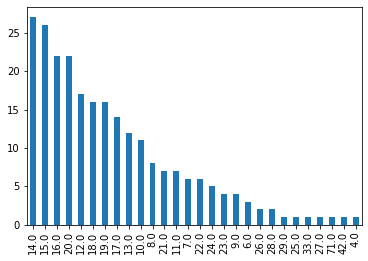

In [3]:
# Calculate percent tip/bill
df['percent_tip'] = (df['tip'] * 100.0 / df['total_bill']).round()

# Plot value counts of percent tip
df['percent_tip'] \
    .value_counts() \
    .plot(kind = 'bar')
plt.show()

- Conclude: The model won't correct as `percent_tip` variates

# Loss function
- A loss function represent the error of a model with its parameters and the actual value
    + $L(\theta\ , Y)$
- The smaller loss value = the better model performance
- Objective = Minimize the loss function

#### Mean squared error
$$L(\theta\ , Y) = \frac{1}{n}\ \sum\limits_{i=1}^n \left( y_i - \hat{y}_i \right)^2$$

- $y_i$: actual values (label)
- $\hat{y}_i$: predicted values (from model)

In [4]:
def mse_loss(y_pred, y):
    '''
    Loss function: Mean squared error
    '''
    return ((y_pred - y)**2).mean()

def model(theta, X):
    '''
    Simple model: y_pred = theta * X
    '''
    return theta*X

In [5]:
def fit(X, y, n=1000):
    '''
    Minimize loss function: Find theta
    '''
    # Fit model
    losses = {}
    thetas = np.linspace(0, 1, n)
    for theta in thetas:
        y_pred = model(theta, X)
        loss = mse_loss(y_pred, y)

        losses[theta] = loss

    # Find min loss
    optimum = min(
        losses.items(),
        key=lambda x: x[1])
    print("Min Loss: {:.3f} at theta = {:.2f}" \
        .format(optimum[1], optimum[0]))

    # Plot losses
    plt.plot(list(losses.keys()), list(losses.values()),
        color='b', linewidth=1.5)
    # Plot optimum
    plt.plot(
        optimum[0], optimum[1], 
        'ro', markersize=5)
    # Config
    plt.axis ('tight')
    plt.xlabel('Theta')
    plt.ylabel('MSE Loss')
    plt.show()

Min Loss: 1.178 at theta = 0.14


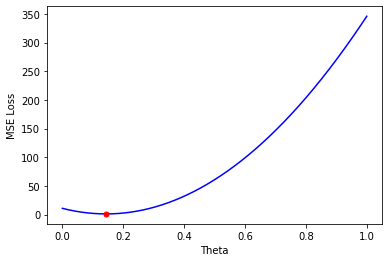

In [6]:
fit(X=df['total_bill'],
    y=df['tip'],
    n=10000)

# Optimization - Gradient Descent
- Fiting high dimension theta: $\theta = [\theta_1\ ,\theta_2\ ,...\ , \theta_n]$, complex model

#### Algorithm
- Pick a random $\theta$
- Calculate slope (**Gradient**): $\frac{\delta}{\delta \theta} L(\theta, Y)$
    + If negative slope (**Point A**)
        + Increase $\theta$ = Decrease loss $L(\theta\ , Y)$
    + If positive slope (**Point B**)
        + Decrease $\theta$ = Decrease loss $L(\theta\ , Y)$

<img src="./assets/1.png" width="400"/>  

$\to$ Update theta function: $\theta_{t+1} = \theta_t - \frac{\delta}{\delta \theta} L(\theta_t, Y)$

- Add learning rate($\alpha$): $\theta_{t+1} = \theta_t - \alpha\ \frac{\delta}{\delta \theta} L(\theta_t, Y)$

- Loop until $|\theta_{t+1} - \theta_t|$ < $\epsilon$
    + $\epsilon$: Stopping condition

#### Apply to simple model and MSE loss
$\begin{cases}
    \text{Gradient: } \frac{\delta\ L(\theta_t\ , Y)}{\delta\ \theta} \\
    \text{MSE Loss function: } L(\theta_t\ , Y) = \frac{1}{n}\ \sum\limits_{i=1}^n(y_i - \hat{y}_i)^2 \\
    \text{Simple Model: } \hat{y}_i = \theta_t \ x_i
\end{cases}$  

$\begin{align*}
\to \text{Gradient: } \frac{\delta\ L(\theta_t\ , Y)}{\delta\ \theta} &= \frac{\delta}{\delta\ \theta}\ \left[ \frac{1}{n}\ \sum\limits_{i=1}^n(y_i - \hat{y}_i)^2 \right] \\
 &= \frac{\delta}{\delta\ \theta}\ \left[ \frac{1}{n}\ \sum\limits_{i=1}^n(y_i - \theta_t \ x_i)^2 \right] \\
 &= \frac{2}{n}\ \sum\limits_{i=1}^n(y_i - \theta_t\ x_i)\ (-x_i) \\
 &= \frac{-2}{n}\ \sum\limits_{i=1}^n(y_i - \theta_t\ x_i)\ (x_i)
\end{align*}$

- Gradient Descent functions  
$\begin{cases}
    \text{Gradient = } \frac{-2}{n}\ \sum\limits_{i=1}^n(y_i - \theta_t\ x_i)\ (x_i) \\
    \text{Update theta: } \theta_{t+1} = \theta_t - \alpha * \text{Gradient}
\end{cases}$

In [7]:
def gradient(X, y, theta):
    '''
    Gradient function for 
        simple model: y_pred = theta * X
        MSE loss
    '''
    n = X.shape[0]
    return (-2.0/n) * ((y - theta*X) * X).sum()

def update_theta(theta, gradient, alpha=0.001):
    return theta - (alpha * gradient)

In [8]:
def mse_loss(y_pred, y):
    '''
    Loss function: Mean squared error
    '''
    return ((y_pred - y)**2).mean()

def model(theta, X):
    '''
    Simple model: y_pred = theta * X
    '''
    return theta*X

In [9]:
import random 

def fit(X, y, epsilon=0.001, alpha=0.001):
    theta = random.uniform(0, 1)

    iters = 0
    while True:
        # compute gradient
        grad = gradient(
            X=X, y=y,
            theta=theta)

        # update theta
        new_theta = update_theta(
            theta=theta,
            gradient=grad,
            alpha=0.001)

        # Update model
        y_pred = model(theta, X)
        loss = mse_loss(y_pred, y)

        # Print
        iters += 1
        print('#### iter {} ####'.format(iters))
        print('Gradient: {:.3f}'.format(grad))
        print('theta: {:.2f}'.format(new_theta))
        print('loss: {:.3f}'.format(loss), end='\n\n')

        # stopping condition
        if (abs(new_theta - theta) < epsilon):
            break

        theta = new_theta

In [10]:
fit(X=df['total_bill'],
    y=df['tip'],
    epsilon=0.001, alpha=0.001)

#### iter 1 ####
Gradient: 565.498
theta: 0.18
loss: 171.130

#### iter 2 ####
Gradient: 33.464
theta: 0.15
loss: 1.773

#### iter 3 ####
Gradient: 1.980
theta: 0.14
loss: 1.180

#### iter 4 ####
Gradient: 0.117
theta: 0.14
loss: 1.178

